In [1]:
import requests
import pandas as pd

# to handle  data retrieval
import urllib3
#from urllib3 import request# to handle certificate verification
import certifi# to manage json data
import json# for pandas dataframes
import pandas as pd

## create small functions for each part, add checks for fail status, make code more modular, and finally create csv files for each pollutant
### Need to work on meteorological data separately. as its not in API

### download from ARB site https://www.arb.ca.gov/aqmis2/pickdl_hrly.php?param=NO2&units=007&year=2020&report=PICKDATA&mon=12&day=31&o3area=&o3pa8=&county_name=--COUNTY--&latitude=--PART+OF+STATE--&basin=SS-Salton+Sea&order=basin%2Ccounty_name%2Cs.name&ptype=aqd&o3switch=new&hours=all&statistic=&qselect=All&start_mon=12&start_day=1&mon=12&day=31&submit=All+Sites&rows=3

In [2]:
email='samiksha.pandey@sjsu.edu'
key='bolemouse52'

In [3]:
#Code to check if API is running
api_up = requests.get('https://aqs.epa.gov/data/api/metaData/isAvailable')
if api_up.status_code==200:
    print(api_up.json()['Header'][0]['status'])
else:
    print('API is down')

API service is up and running healthy. Status: connection_pool: size: 5, connections: 1, in use: 1, waiting_in_queue: 0


In [4]:
#Get metadata from API
metadata=requests.get('https://aqs.epa.gov/data/api/metaData/fieldsByService?'+'email='+email+'&key='+key+'&service=sampleData')
metadata.status_code

200

In [5]:
state_code=requests.get('https://aqs.epa.gov/data/api/list/states?'+'email='+email+'&key='+key)
state_code.status_code

200

In [6]:
(state_code.json()['Data'])

[{'code': '01', 'value_represented': 'Alabama'},
 {'code': '02', 'value_represented': 'Alaska'},
 {'code': '04', 'value_represented': 'Arizona'},
 {'code': '05', 'value_represented': 'Arkansas'},
 {'code': '06', 'value_represented': 'California'},
 {'code': '08', 'value_represented': 'Colorado'},
 {'code': '09', 'value_represented': 'Connecticut'},
 {'code': '10', 'value_represented': 'Delaware'},
 {'code': '11', 'value_represented': 'District Of Columbia'},
 {'code': '12', 'value_represented': 'Florida'},
 {'code': '13', 'value_represented': 'Georgia'},
 {'code': '15', 'value_represented': 'Hawaii'},
 {'code': '16', 'value_represented': 'Idaho'},
 {'code': '17', 'value_represented': 'Illinois'},
 {'code': '18', 'value_represented': 'Indiana'},
 {'code': '19', 'value_represented': 'Iowa'},
 {'code': '20', 'value_represented': 'Kansas'},
 {'code': '21', 'value_represented': 'Kentucky'},
 {'code': '22', 'value_represented': 'Louisiana'},
 {'code': '23', 'value_represented': 'Maine'},
 {'

### We can confirm that code for california is 06 which we will use in other requests

In [7]:
county_codes=requests.get('https://aqs.epa.gov/data/api/list/countiesByState?'+'email='+email+'&key='+key+'&state=06')
county_codes.status_code

200

In [8]:
county_code=county_codes.json()['Data']

imperial_code=list(filter(lambda item: item["value_represented"] == "Imperial", county_code))[0]['code']
riverside_code=list(filter(lambda item: item["value_represented"] == "Riverside", county_code))[0]['code']
print("Imperial County Code=",imperial_code)
print("Riverside County Code=",riverside_code)

Imperial County Code= 025
Riverside County Code= 065


### This data gives county codes for imperial and riverside county(These are the counties close to salton sea area) i.e 025 and 065 respectively

In [9]:
sites_codes_imperial=requests.get('https://aqs.epa.gov/data/api/list/sitesByCounty?'+'email='+email+'&key='+key+'&state=06&county='+imperial_code)

sites_codes_imperial.status_code

200

In [10]:
(sites_codes_imperial.json()['Data'])

[{'code': '0001', 'value_represented': None},
 {'code': '0002', 'value_represented': None},
 {'code': '0003', 'value_represented': 'Brawley-401 Main St.'},
 {'code': '0004', 'value_represented': 'Calexico-Grant Street'},
 {'code': '0005', 'value_represented': 'Calexico-Ethel Street'},
 {'code': '0006',
  'value_represented': 'PORT OF ENTRY BETWEEN MEXICO AND USA. SCHEDULED TO OPEN 8/96'},
 {'code': '0007', 'value_represented': 'Brawley-220 Main Street'},
 {'code': '0010', 'value_represented': None},
 {'code': '1001', 'value_represented': 'Calexico Fire Station'},
 {'code': '1002', 'value_represented': None},
 {'code': '1003', 'value_represented': 'El Centro-9th Street'},
 {'code': '2001', 'value_represented': None},
 {'code': '3001', 'value_represented': 'El Centro-Broadway'},
 {'code': '4001', 'value_represented': None},
 {'code': '4002', 'value_represented': 'Winterhaven'},
 {'code': '4003', 'value_represented': 'Westmorland'},
 {'code': '4004', 'value_represented': 'Niland-English R

In [73]:
sites_codes_riverside=requests.get('https://aqs.epa.gov/data/api/list/sitesByCounty?'+'email='+email+'&key='+key+'&state=06&county='+riverside_code)

sites_codes_riverside.status_code

200

In [74]:
(sites_codes_riverside.json()['Data'])

[{'code': '0001', 'value_represented': None},
 {'code': '0002', 'value_represented': 'Banning-Allesandro'},
 {'code': '0003', 'value_represented': 'Norco'},
 {'code': '0004', 'value_represented': 'Mira Loma (Bellegrave)'},
 {'code': '0005', 'value_represented': None},
 {'code': '0006', 'value_represented': None},
 {'code': '0007', 'value_represented': 'Blythe-449 W. Murphy St.'},
 {'code': '0008', 'value_represented': 'Joshua Tree NP - Cottonwood'},
 {'code': '0009', 'value_represented': 'Pechanga'},
 {'code': '0010',
  'value_represented': 'Joshua Tree NP - Cottonwood Visitor Center'},
 {'code': '0012', 'value_represented': 'Banning Airport'},
 {'code': '0016', 'value_represented': 'Temecula'},
 {'code': '0101', 'value_represented': None},
 {'code': '0500', 'value_represented': '29 Palms'},
 {'code': '1001', 'value_represented': None},
 {'code': '1002', 'value_represented': None},
 {'code': '1003', 'value_represented': 'Riverside (Magnolia)'},
 {'code': '1004', 'value_represented': 'J

In [11]:
param_class_code=requests.get('https://aqs.epa.gov/data/api/list/classes?'+'email='+email+'&key='+key)
#https://aqs.epa.gov/data/api/list/classes?email=test@aqs.api&key=test
param_class_code.status_code

200

In [12]:
(param_class_code.json()['Data'])

[{'code': 'AIRNOW MAPS',
  'value_represented': 'The parameters represented on AirNow maps (88101, 88502, and 44201)'},
 {'code': 'ALL', 'value_represented': 'Select all Parameters Available'},
 {'code': 'AQI POLLUTANTS',
  'value_represented': 'Pollutants that have an AQI Defined'},
 {'code': 'CORE_HAPS', 'value_represented': 'Urban Air Toxic Pollutants'},
 {'code': 'CRITERIA', 'value_represented': 'Criteria Pollutants'},
 {'code': 'CSN DART',
  'value_represented': 'List of CSN speciation parameters to populate the STI DART tool'},
 {'code': 'FORECAST',
  'value_represented': 'Parameters routinely extracted by AirNow (STI)'},
 {'code': 'HAPS', 'value_represented': 'Hazardous Air Pollutants'},
 {'code': 'IMPROVE CARBON', 'value_represented': 'IMPROVE Carbon Parameters'},
 {'code': 'IMPROVE_SPECIATION',
  'value_represented': 'PM2.5 Speciated Parameters Measured at IMPROVE sites'},
 {'code': 'MET', 'value_represented': 'Meteorological Parameters'},
 {'code': 'NATTS CORE HAPS',
  'value

In [134]:
#https://aqs.epa.gov/data/api/list/parametersByClass?email=test@aqs.api&key=test&pc=CRITERIA
param_code=requests.get('https://aqs.epa.gov/data/api/list/parametersByClass?'+'email='+email+'&key='+key+'&pc=AQI POLLUTANTS')
param_code.status_code

200

In [135]:
(param_code.json()['Data'])

[{'code': '42101', 'value_represented': 'Carbon monoxide'},
 {'code': '42401', 'value_represented': 'Sulfur dioxide'},
 {'code': '42602', 'value_represented': 'Nitrogen dioxide (NO2)'},
 {'code': '44201', 'value_represented': 'Ozone'},
 {'code': '81102', 'value_represented': 'PM10 Total 0-10um STP'},
 {'code': '88101', 'value_represented': 'PM2.5 - Local Conditions'},
 {'code': '88502',
  'value_represented': 'Acceptable PM2.5 AQI & Speciation Mass'}]

In [35]:
#Wind 61103
year_list=[2015,2016,2017,2018,2019,2020]
#wind_speed=requests.get('https://aqs.epa.gov/data/api/sampleData/bySite?'+'email='+email+'&key='+key+'&param=61103&bdate=20150101&edate=20151231&state=06&county=025&site=0005')
wind_speed=requests.get('https://aqs.epa.gov/data/api/sampleData/bySite?'+'email='+email+'&key='+key+'&param=61103&bdate='+str(year_list[0])+'0101&edate='+str(year_list[0])+'1231&state=06&county=025&site=0005')
wind_speed.status_code

200

In [99]:
year_list=[2015,2016,2017,2018,2019,2020,2021]
responses=list()
for year in year_list:
    wind_speed=requests.get('https://aqs.epa.gov/data/api/sampleData/bySite?'+'email='+email+'&key='+key+'&param=61103&bdate='+str(year)+'0101&edate='+str(year)+'1231&state=06&county=025&site=0005')
    data=(wind_speed.json()['Data'])
    responses.append(data)

In [100]:
yr_2015=pd.json_normalize(responses[0])
yr_2016=pd.json_normalize(responses[1])
yr_2017=pd.json_normalize(responses[2])
yr_2018=pd.json_normalize(responses[3])
yr_2019=pd.json_normalize(responses[4])
yr_2020=pd.json_normalize(responses[5])
yr_2021=pd.json_normalize(responses[6])

frames = [yr_2015,yr_2016 , yr_2017,yr_2018,yr_2019,yr_2020,yr_2021]
df_wind = pd.concat(frames)

In [101]:
df_wind

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,06,025,0005,61103,2,32.67618,-115.48307,NAD83,Wind Speed - Resultant,2015-01-01,...,0.1,None,None,Non-FRM,Instrumental - RM Young Ultrasonic Anemometer ...,066,California,Imperial,2015-05-26,20940
1,06,025,0005,61103,2,32.67618,-115.48307,NAD83,Wind Speed - Resultant,2015-01-01,...,0.1,None,None,Non-FRM,Instrumental - RM Young Ultrasonic Anemometer ...,066,California,Imperial,2015-05-26,20940
2,06,025,0005,61103,2,32.67618,-115.48307,NAD83,Wind Speed - Resultant,2015-01-01,...,0.1,None,None,Non-FRM,Instrumental - RM Young Ultrasonic Anemometer ...,066,California,Imperial,2015-05-26,20940
3,06,025,0005,61103,2,32.67618,-115.48307,NAD83,Wind Speed - Resultant,2015-01-01,...,0.1,None,None,Non-FRM,Instrumental - RM Young Ultrasonic Anemometer ...,066,California,Imperial,2015-05-26,20940
4,06,025,0005,61103,2,32.67618,-115.48307,NAD83,Wind Speed - Resultant,2015-01-01,...,0.1,None,None,Non-FRM,Instrumental - RM Young Ultrasonic Anemometer ...,066,California,Imperial,2015-05-26,20940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,06,025,0005,61103,2,32.67618,-115.48307,NAD83,Wind Speed - Resultant,2021-03-31,...,0.1,None,None,Non-FRM,Instrumental - RM Young Ultrasonic Anemometer ...,066,California,Imperial,2021-09-14,20940
2156,06,025,0005,61103,2,32.67618,-115.48307,NAD83,Wind Speed - Resultant,2021-03-31,...,0.1,None,None,Non-FRM,Instrumental - RM Young Ultrasonic Anemometer ...,066,California,Imperial,2021-09-14,20940
2157,06,025,0005,61103,2,32.67618,-115.48307,NAD83,Wind Speed - Resultant,2021-03-31,...,0.1,None,None,Non-FRM,Instrumental - RM Young Ultrasonic Anemometer ...,066,California,Imperial,2021-09-14,20940
2158,06,025,0005,61103,2,32.67618,-115.48307,NAD83,Wind Speed - Resultant,2021-03-31,...,0.1,None,None,Non-FRM,Instrumental - RM Young Ultrasonic Anemometer ...,066,California,Imperial,2021-09-14,20940


In [102]:
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54440 entries, 0 to 2159
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state_code             54440 non-null  object 
 1   county_code            54440 non-null  object 
 2   site_number            54440 non-null  object 
 3   parameter_code         54440 non-null  object 
 4   poc                    54440 non-null  int64  
 5   latitude               54440 non-null  float64
 6   longitude              54440 non-null  float64
 7   datum                  54440 non-null  object 
 8   parameter              54440 non-null  object 
 9   date_local             54440 non-null  object 
 10  time_local             54440 non-null  object 
 11  date_gmt               54440 non-null  object 
 12  time_gmt               54440 non-null  object 
 13  sample_measurement     53773 non-null  float64
 14  units_of_measure       54440 non-null  object 
 15  uni

In [125]:
hourly_data=df_wind[df_wind.sample_frequency.eq('HOURLY')]

In [126]:
hourly_data[['site_number','parameter_code','date_local','time_local','sample_measurement','units_of_measure','units_of_measure_code','sample_duration','sample_duration_code','sample_frequency','method_type','cbsa_code']]

,site_number,parameter_code,date_local,time_local,sample_measurement,units_of_measure,units_of_measure_code,sample_duration,sample_duration_code,sample_frequency,method_type,cbsa_code
0,0005,61103,2015-01-01,00:00,0.8,Knots,013,1 HOUR,1,HOURLY,Non-FRM,20940
1,0005,61103,2015-01-01,01:00,1.3,Knots,013,1 HOUR,1,HOURLY,Non-FRM,20940
2,0005,61103,2015-01-01,02:00,1.4,Knots,013,1 HOUR,1,HOURLY,Non-FRM,20940
3,0005,61103,2015-01-01,03:00,0.7,Knots,013,1 HOUR,1,HOURLY,Non-FRM,20940
4,0005,61103,2015-01-01,04:00,1.1,Knots,013,1 HOUR,1,HOURLY,Non-FRM,20940
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0005,61103,2021-03-31,19:00,2.1,Knots,013,1 HOUR,1,HOURLY,Non-FRM,20940
2156,0005,61103,2021-03-31,20:00,2.0,Knots,013,1 HOUR,1,HOURLY,Non-FRM,20940
2157,0005,61103,2021-03-31,21:00,2.9,Knots,013,1 HOUR,1,HOURLY,Non-FRM,20940
2158,0005,61103,2021-03-31,22:00,2.9,Knots,013,1 HOUR,1,HOURLY,Non-FRM,20940


In [127]:
hourly_data=hourly_data[['date_local','time_local','sample_measurement']]

In [128]:
hourly_data.rename(columns={'sample_measurement':'Wind_Speed','date_local':'date'},inplace=True)

In [129]:
hourly_data['start_hour'] = pd.to_datetime(hourly_data['time_local'], format='%H:%M').dt.hour

In [130]:
hourly_data=hourly_data[['date','start_hour','Wind_Speed']]

In [131]:
hourly_data.head(26)

,date,start_hour,Wind_Speed
0,2015-01-01,0,0.8
1,2015-01-01,1,1.3
2,2015-01-01,2,1.4
3,2015-01-01,3,0.7
4,2015-01-01,4,1.1
5,2015-01-01,5,0.6
6,2015-01-01,6,0.9
7,2015-01-01,7,0.3
8,2015-01-01,8,0.6
9,2015-01-01,9,0.7


In [132]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54440 entries, 0 to 2159
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        54440 non-null  object 
 1   start_hour  54440 non-null  int64  
 2   Wind_Speed  53773 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [133]:
hourly_data.to_csv('../New_Data/Weather/Wind_Data.csv',index=False)

### PM2.5

In [ ]:
#PM10: 81102
#PM 2.5: 88101
#CO: 

In [181]:
year_list=[2015,2016,2017,2018,2019,2020,2021]
responses=list()
for year in year_list:
    PM25=requests.get('https://aqs.epa.gov/data/api/sampleData/bySite?'+'email='+email+'&key='+key+'&param=88101&bdate='+str(year)+'0101&edate='+str(year)+'1231&state=06&county=025&site=0005')
    data=(PM25.json()['Data'])
    responses.append(data)

In [182]:
yr_2015=pd.json_normalize(responses[0])
yr_2016=pd.json_normalize(responses[1])
yr_2017=pd.json_normalize(responses[2])
yr_2018=pd.json_normalize(responses[3])
yr_2019=pd.json_normalize(responses[4])
yr_2020=pd.json_normalize(responses[5])
yr_2021=pd.json_normalize(responses[6])

frames = [yr_2015,yr_2016 , yr_2017,yr_2018,yr_2019,yr_2020,yr_2021]
df_PM25 = pd.concat(frames)

In [183]:
df_PM25

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,06,025,0005,88101,1,32.67618,-115.48307,NAD83,PM2.5 - Local Conditions,2015-01-01,...,2.0,None,None,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,California,Imperial,2015-09-25,20940
1,06,025,0005,88101,1,32.67618,-115.48307,NAD83,PM2.5 - Local Conditions,2015-01-02,...,2.0,None,None,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,California,Imperial,2015-09-25,20940
2,06,025,0005,88101,1,32.67618,-115.48307,NAD83,PM2.5 - Local Conditions,2015-01-03,...,2.0,None,AK - Filter Leak.,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,California,Imperial,2015-09-25,20940
3,06,025,0005,88101,1,32.67618,-115.48307,NAD83,PM2.5 - Local Conditions,2015-01-04,...,2.0,None,None,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,California,Imperial,2015-09-25,20940
4,06,025,0005,88101,1,32.67618,-115.48307,NAD83,PM2.5 - Local Conditions,2015-01-05,...,2.0,None,None,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,California,Imperial,2015-09-25,20940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,06,025,0005,88101,3,32.67618,-115.48307,NAD83,PM2.5 - Local Conditions,2021-03-31,...,2.0,None,None,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Imperial,2021-09-14,20940
2156,06,025,0005,88101,3,32.67618,-115.48307,NAD83,PM2.5 - Local Conditions,2021-03-31,...,2.0,None,None,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Imperial,2021-09-14,20940
2157,06,025,0005,88101,3,32.67618,-115.48307,NAD83,PM2.5 - Local Conditions,2021-03-31,...,2.0,None,None,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Imperial,2021-09-14,20940
2158,06,025,0005,88101,3,32.67618,-115.48307,NAD83,PM2.5 - Local Conditions,2021-03-31,...,2.0,None,None,FEM,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,170,California,Imperial,2021-09-14,20940


In [159]:
#df_PM25

df_PM25[['site_number','parameter_code','date_local','time_local','sample_measurement','units_of_measure','units_of_measure_code','sample_duration','sample_duration_code','sample_frequency','method_type','cbsa_code']]

KeyError: "None of [Index(['site_number', 'parameter_code', 'date_local', 'time_local',\n       'sample_measurement', 'units_of_measure', 'units_of_measure_code',\n       'sample_duration', 'sample_duration_code', 'sample_frequency',\n       'method_type', 'cbsa_code'],\n      dtype='object')] are in the [columns]"

In [147]:
# Draw Plot
from matplotlib import pyplot as plt
import seaborn as sns

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

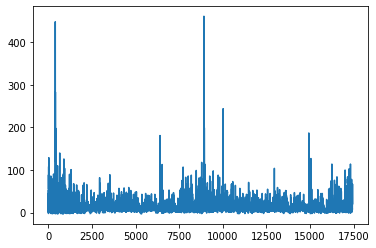

In [154]:
plt.plot(df_PM25['sample_measurement'])

<AxesSubplot:xlabel='sample_measurement'>

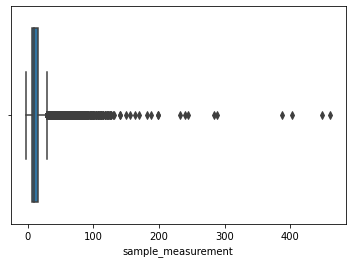

In [155]:
sns.boxplot(df_PM25['sample_measurement'])

ValueError: x and y must have same first dimension, but have shapes (8784,) and (45740,)

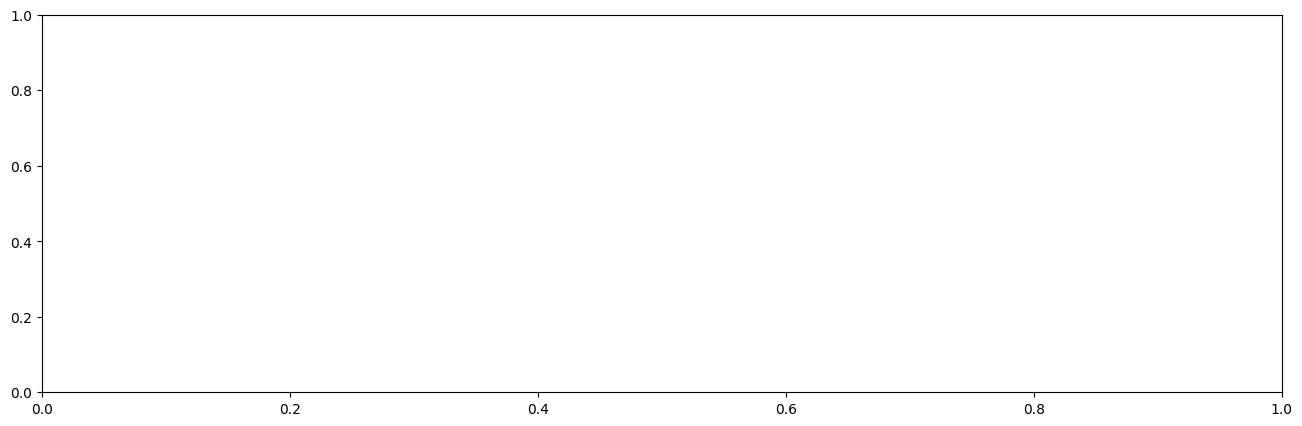

In [148]:
plot_df(df_PM25, x=df.index, y=df_PM25['sample_measurement'], title='Hourly sample_measurement from 2015-2021')   